



## Skin Cancer Classification using CNN ##


In [ ]:
#import libraries
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [ ]:
keras.__version__

'2.7.0'

In [ ]:
train_data_path = "/content/drive/My Drive/major_proj/Skincancer/train"
validation_data_path = "/content/drive/My Drive/major_proj/Skincancer/test"

In [ ]:
pip install Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 2648 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'benign': 0, 'malignant': 1}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 660 images belonging to 2 classes.


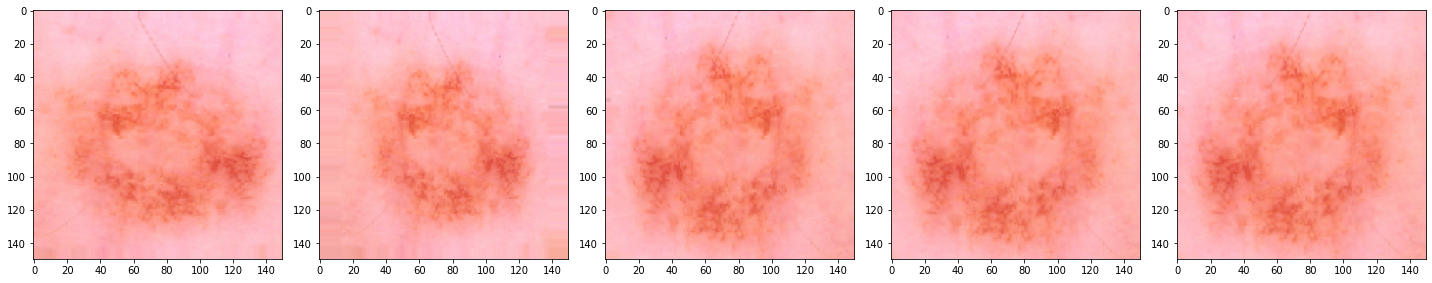

In [ ]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
# save best model using vall accuracy
model_path = '/content/drive/My Drive/My ML Project/DL Project/CNN/skin disease prediction/skink.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:

#Building cnn model
cnn_model = keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), input_shape=[150, 150, 3]),
keras.layers.Activation('relu'),
keras.layers.MaxPooling2D(pool_size=(2, 2)),

keras.layers.Conv2D(32, (3, 3)),
keras.layers.Activation('relu'),
keras.layers.MaxPooling2D(pool_size=(2, 2)),

keras.layers.Conv2D(64, (3, 3)),
keras.layers.Activation('relu'),
keras.layers.MaxPooling2D(pool_size=(2, 2)),
keras.layers.Flatten(),
keras.layers.Dense(64),
keras.layers.Activation('relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(1),
keras.layers.Activation('sigmoid')])

cnn_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])




In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [ ]:
# train cnn model
history = cnn_model.fit(training_data,
                          epochs=100,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/100
83/83 [==============================] - ETA: 0s - loss: 0.6954 - accuracy: 0.6182
Epoch 00001: val_accuracy improved from -inf to 0.59242, saving model to /content/drive/My Drive/My ML Project/DL Project/CNN/cotton plant disease prediction/skink.h5
83/83 [==============================] - 677s 8s/step - loss: 0.6954 - accuracy: 0.6182 - val_loss: 0.7238 - val_accuracy: 0.5924
Epoch 2/100
83/83 [==============================] - ETA: 0s - loss: 0.5778 - accuracy: 0.7043
Epoch 00002: val_accuracy improved from 0.59242 to 0.75909, saving model to /content/drive/My Drive/My ML Project/DL Project/CNN/cotton plant disease prediction/skink.h5
83/83 [==============================] - 22s 270ms/step - loss: 0.5778 - accuracy: 0.7043 - val_loss: 0.4963 - val_accuracy: 0.7591
Epoch 3/100
83/83 [==============================] - ETA: 0s - loss: 0.5275 - accuracy: 0.7402
Epoch 00003: val_accuracy did not improve from 0.75909
83/83 [==============================] - 22s 264ms/step - los

In [ ]:
model_path2 = '/content/drive/My Drive/My ML Project /DL Project/CNN/skin disease prediction/skin.h5'
cnn_model.save(model_path2)

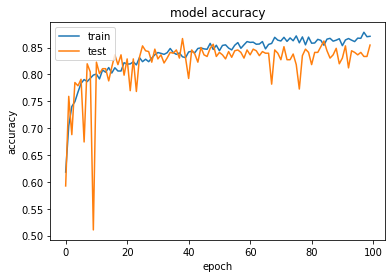

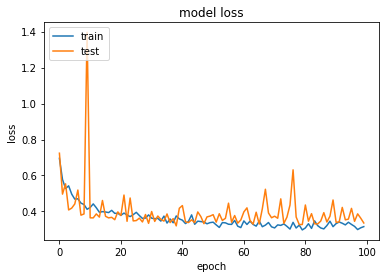

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history.history

{'accuracy': [0.6182023882865906,
  0.704305112361908,
  0.7401812672615051,
  0.7492446899414062,
  0.7669939398765564,
  0.7832326292991638,
  0.7904078364372253,
  0.7866314053535461,
  0.7926737070083618,
  0.7987160086631775,
  0.8006042242050171,
  0.791540801525116,
  0.8081570863723755,
  0.8040030002593994,
  0.8126888275146484,
  0.8024924397468567,
  0.8123111724853516,
  0.8062688708305359,
  0.8062688708305359,
  0.8217522501945496,
  0.819108784198761,
  0.8194863796234131,
  0.8232628107070923,
  0.8175981640815735,
  0.8311933279037476,
  0.8236404657363892,
  0.8281722068786621,
  0.8236404657363892,
  0.8304380774497986,
  0.8364803791046143,
  0.8406344652175903,
  0.8391238451004028,
  0.8372356295585632,
  0.8402568101882935,
  0.8481873273849487,
  0.8406344652175903,
  0.8372356295585632,
  0.8398791551589966,
  0.8327039480209351,
  0.8311933279037476,
  0.8417673707008362,
  0.842900276184082,
  0.8402568101882935,
  0.8481873273849487,
  0.8493202328681946,
  